<a href="https://colab.research.google.com/github/Ankitaashok20/LowPassFilterForSpeechEnhancement/blob/main/Signals_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import scipy
from scipy import signal
from scipy.io.wavfile import read, write

In [ ]:
from scipy.io.wavfile import read,write
from IPython import display as IPD
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from scipy.fft import fft, fftfreq,ifft
from scipy.signal import stft,istft

### **Taking Input audio file and audio file with noise as input**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
sr_input, audio_input= read("test.wav")
#sr_input is the sample rate (number of samples of audio recorded every second) and audio_input is the data

sr_noise, noise = read("test_noise.wav")
#sr_noise is the sample rate (number of samples of audio recorded every second) and noise is the data
print(audio_input.shape, sr_input)
print(noise.shape, sr_noise)

(64000,) 16000
(64000,) 16000


In [ ]:
IPD.Audio("test.wav")

In [ ]:
IPD.Audio("test_noise.wav")

# Plotting input_audio and noisy data

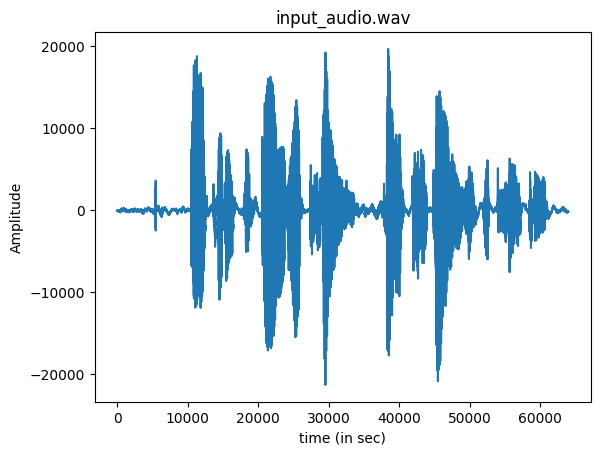

In [ ]:
plt.plot(audio_input)
plt.title("input_audio.wav")
plt.xlabel("time (in sec)")
plt.ylabel("Amplitude")
plt.show()


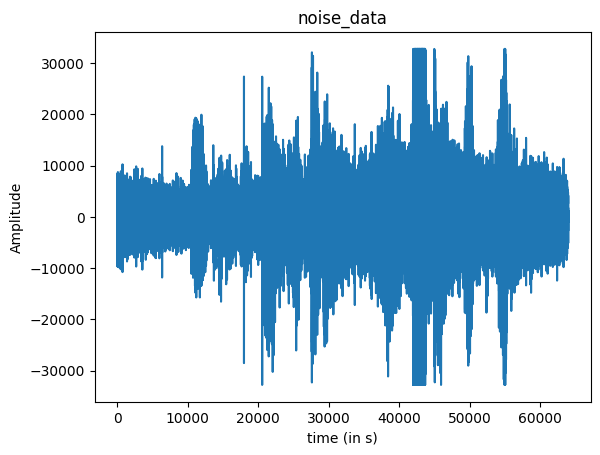

In [ ]:
plt.plot(noise)
plt.title("noise_data")
plt.xlabel("time (in s)")
plt.ylabel("Amplitude")
plt.show()

### Time Domain Filtering using Low Pass Filters

In [ ]:
def moving_avg(audio_input,window_size):
    y =[]
    index=(window_size-1)//2
    for i in range(index,audio_input.shape[0]-index):
        r= float(np.sum(audio_input[i-index:i+index+1])/window_size)
        y.append(r)
    return np.array(y).astype(np.int16)

In [ ]:
moving_avg_out = moving_avg(noise,5)
write("moving_avg_out.wav",sr_input,moving_avg_out)
IPD.Audio("moving_avg_out.wav")

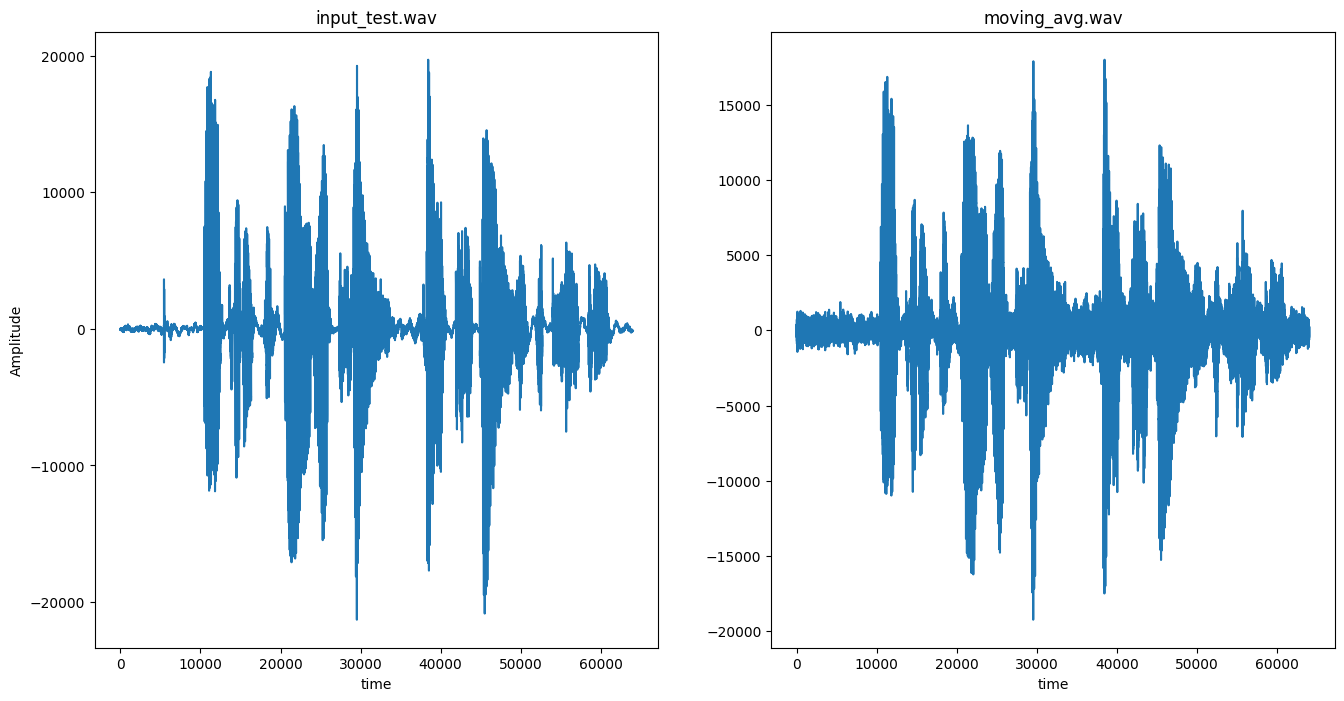

In [ ]:
f,(ax1,ax2)=plt.subplots(1,2)
f.set_figwidth(16)
f.set_figheight(8)
ax1.plot(audio_input)
ax1.set_title("input_test.wav")
ax1.set_xlabel("time")
ax1.set_ylabel("Amplitude")

ax2.plot(moving_avg_out)
#ax2.get_yaxis().set_visible(False)
ax2.set_title("moving_avg.wav")
ax2.set_xlabel("time")
plt.show()

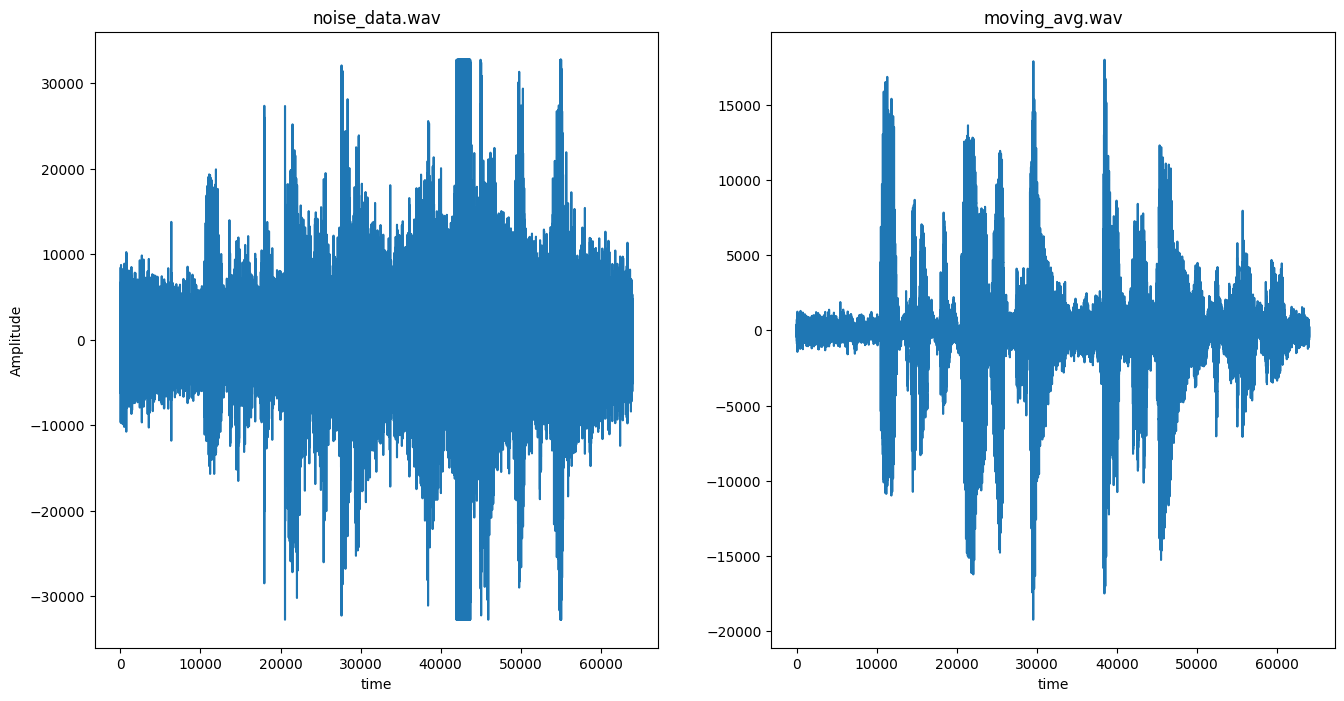

In [ ]:
f,(ax1,ax2)=plt.subplots(1,2)
f.set_figwidth(16)
f.set_figheight(8)
ax1.plot(noise)
ax1.set_title("noise_data.wav")
ax1.set_xlabel("time")
ax1.set_ylabel("Amplitude")

ax2.plot(moving_avg_out)
#ax2.get_yaxis().set_visible(False)
ax2.set_title("moving_avg.wav")
ax2.set_xlabel("time")
plt.show()

### **CALCULATING SOUND TO NOISE RATIO(SNR) AFTER APPLING LOW PASS FILTER**

In [ ]:
import scipy
from scipy import signal
from scipy.io.wavfile import read, write
import numpy as np
from matplotlib import pyplot as plt
import math

sr_input, audio_input = read("test.wav")  # input audio
sr_noise, noise = read("test_noise.wav")  # noise audio

# Ensure both signals have the same length
min_len = min(len(audio_input), len(noise))
audio_input = audio_input[:min_len]
noise = noise[:min_len]

# Define the moving average filter
def moving_avg(audio_input, window_size):
    y = []
    index = (window_size - 1) // 2
    for i in range(index, audio_input.shape[0] - index):
        r = float(np.sum(audio_input[i - index:i + index + 1]) / window_size)
        y.append(r)
    return np.array(y).astype(np.int16)

# Apply moving average to noise
moving_avg_out = moving_avg(noise, 5)

# Truncate arrays to the same length (moving_avg_out is slightly shorter due to window size)
min_len = min(len(noise), len(moving_avg_out))
noise = noise[:min_len]
moving_avg_out = moving_avg_out[:min_len]
audio_input = audio_input[:min_len]

# SNR calculation function
def calculate_snr(signal, noise):
    power_signal = np.mean(signal ** 2)
    power_noise = np.mean(noise ** 2)
    snr = 10 * np.log10(power_signal / power_noise)
    return snr

# Calculate noise in the input signal
noise_in_signal = audio_input - noise

# Calculate SNRs
snr_noisy = calculate_snr(audio_input, noise_in_signal)
filtered_noise = noise - moving_avg_out
snr_filtered = calculate_snr(audio_input, filtered_noise)

# Improvement in SNR
improvement = snr_filtered - snr_noisy
print(f"SNR of noisy signal: {snr_noisy:.2f} dB")
print(f"SNR of filtered signal: {snr_filtered:.2f} dB")
print(f"Improvement in SNR: {improvement:.2f} dB")

SNR of noisy signal: 12.88 dB
SNR of filtered signal: 15.49 dB
Improvement in SNR: 2.62 dB


### **Spectral Subtraction**

In [ ]:
from scipy.io.wavfile import read,write
from IPython import display as IPD
sr_noiseonly, noise_only= read("Noise_only.wav")
IPD.Audio("Noise_only.wav")

In [ ]:
f,t,s = stft(noise,sr_noise, nperseg= 1000)
modulus_s = np.abs(s)
angle_s = np.angle(s)
phase_s = np.exp(1.0j*angle_s)

f1, t1,ns= stft(noise_only, sr_noiseonly,nperseg=  1000)
modulus_ns = np.abs(ns)
mean_mod_ns = np.mean(modulus_ns,axis=1)

In [ ]:
res_mod = modulus_s-mean_mod_ns.reshape((mean_mod_ns.shape[0],1))

res = res_mod*phase_s
dtimes,res_inv = istft(res,sr_input)
s_sub_out=res_inv.astype(np.int16)

In [ ]:
write("s_sub_out.wav",sr_input,s_sub_out)
IPD.Audio("s_sub_out.wav")

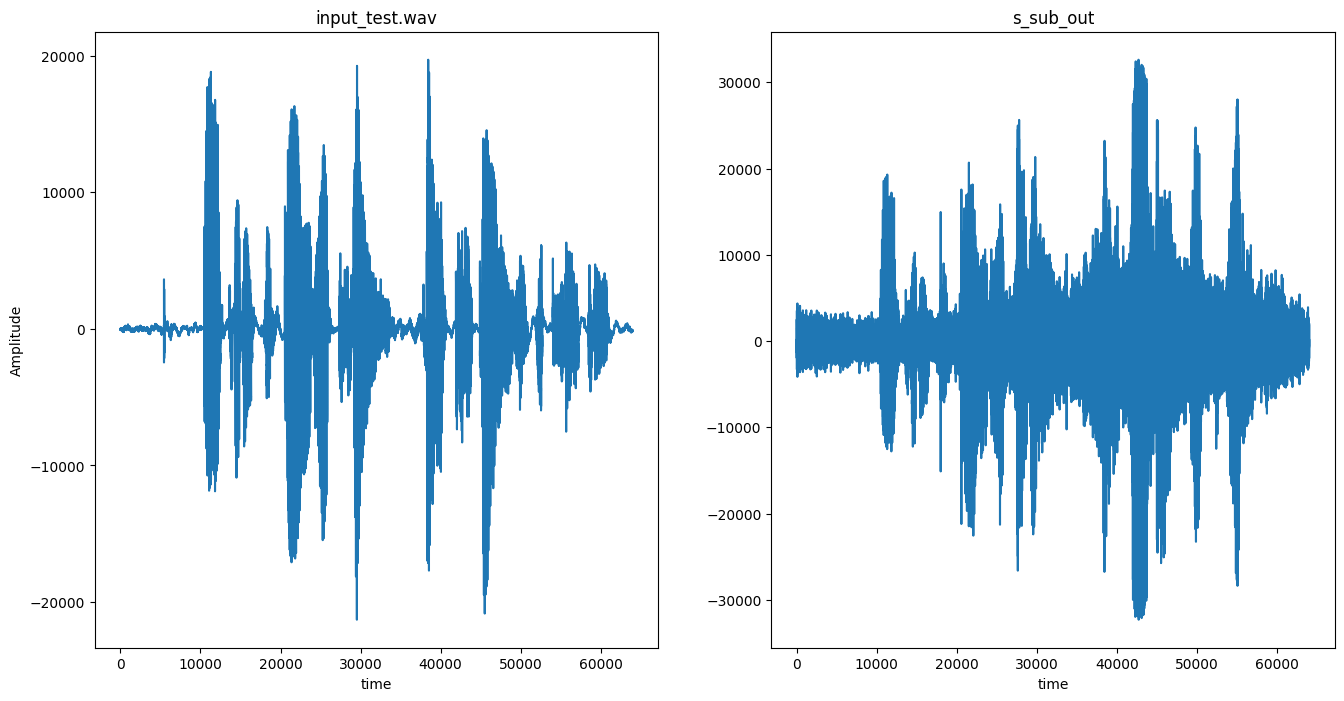

In [ ]:
f,(ax1,ax2)=plt.subplots(1,2)
f.set_figwidth(16)
f.set_figheight(8)
ax1.plot(audio_input)
ax1.set_title("input_test.wav")
ax1.set_xlabel("time")
ax1.set_ylabel("Amplitude")

ax2.plot(s_sub_out)
#ax2.get_yaxis().set_visible(False)
ax2.set_title("s_sub_out")
ax2.set_xlabel("time")
plt.show()

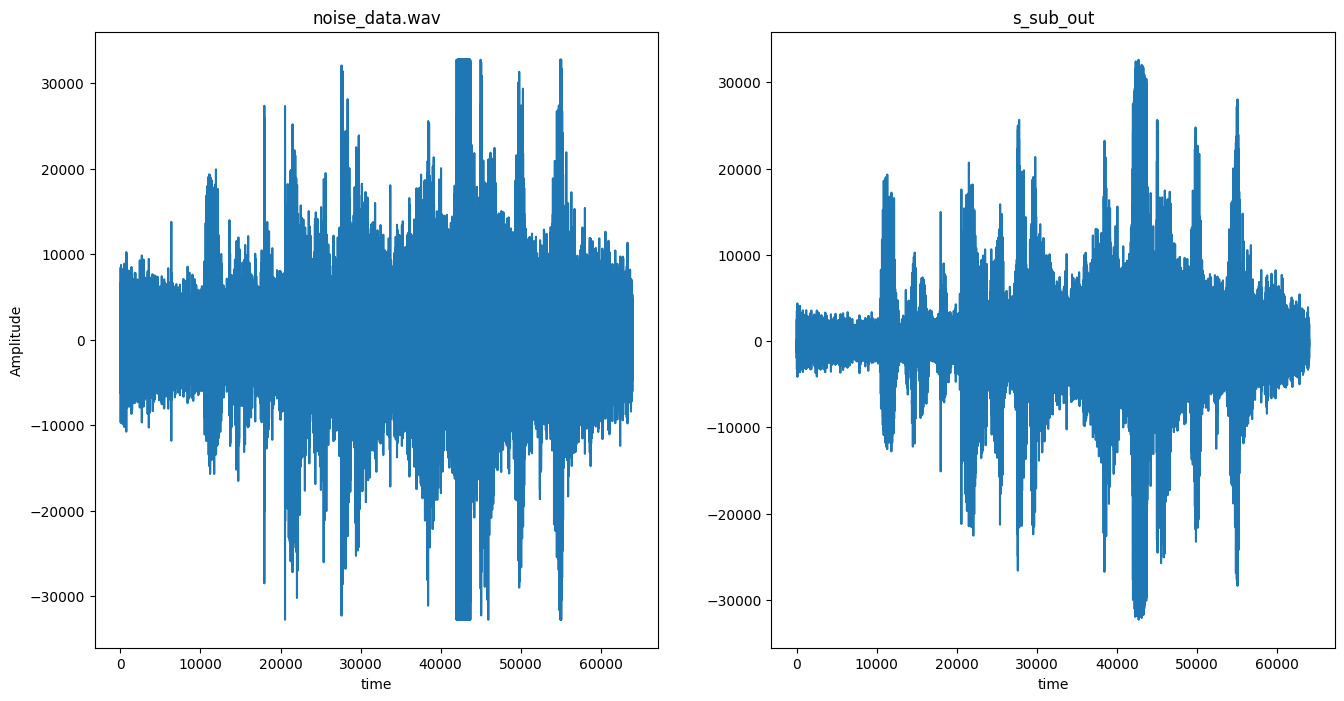

In [ ]:
f,(ax1,ax2)=plt.subplots(1,2)
f.set_figwidth(16)
f.set_figheight(8)
ax1.plot(noise)
ax1.set_title("noise_data.wav")
ax1.set_xlabel("time")
ax1.set_ylabel("Amplitude")

ax2.plot(s_sub_out)
#ax2.get_yaxis().set_visible(False)
ax2.set_title("s_sub_out")
ax2.set_xlabel("time")
plt.show()

### **Frequency domain filtering**

In [ ]:
def plot_fft(N,sr_input,audio_input):
    T = 1.0 / sr_input
    audio_input_f = fft(audio_input)    #Computed Fourier transform of audio input
    xf = fftfreq(N, T)[:N//2]           #calculates the frequencies in the center of each bin in the output of fft()
    plt.plot(xf, 2.0/N * np.abs(audio_input_f[0:N//2]))
    plt.xlabel("Frequency")
    plt.ylabel("X(Jw)")
    plt.grid()
    plt.show()

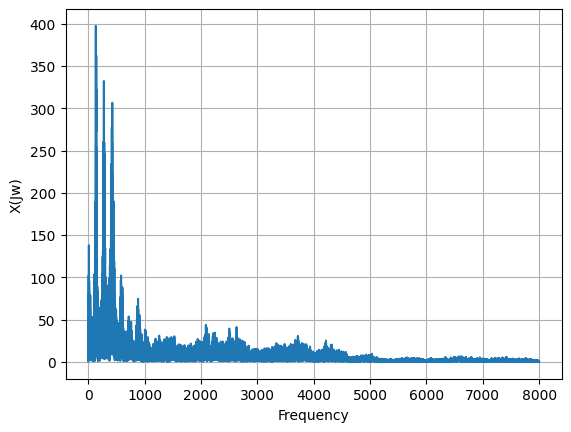

In [ ]:
plot_fft(audio_input.shape[0],sr_input,audio_input)

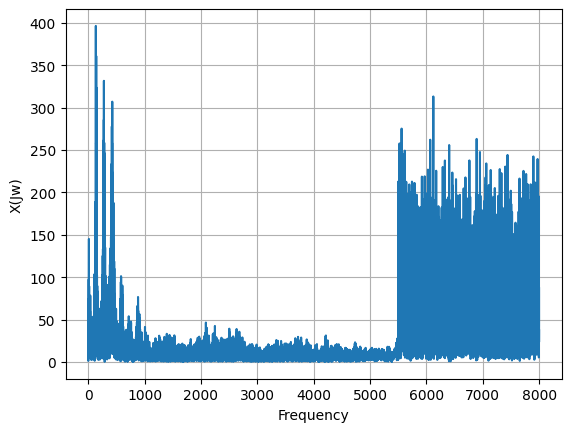

In [ ]:
plot_fft(audio_input.shape[0],sr_noise,noise)

In [ ]:
def f_domain_filter(N,sr_input,audio_input,cutoff_f, low_pass=True):
    fft_x = fft(audio_input)
    T = 1.0 / sr_input
    xf = fftfreq(N, T)
    mask=np.ones(audio_input.shape[0])

    if low_pass:
        mask = np.abs(xf)<cutoff_f
    else:
        mask = np.abs(xf)>cutoff_f

    fft_y = fft_x*mask
    return (ifft(fft_y).astype(np.int16))


In [ ]:
fft_filter_out = f_domain_filter(audio_input.shape[0],sr_noise,noise,3000)
write("fft_filter_out.wav",sr_input,fft_filter_out)
IPD.Audio("fft_filter_out.wav")

<ipython-input-23-e0539b15fe25>:13: ComplexWarning: Casting complex values to real discards the imaginary part
  return (ifft(fft_y).astype(np.int16))


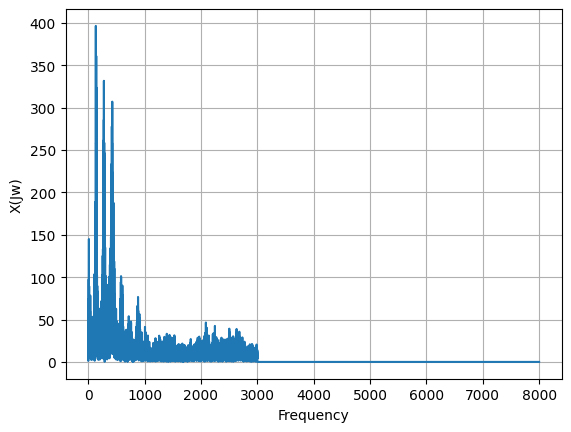

In [ ]:
plot_fft(audio_input.shape[0],sr_input,fft_filter_out)

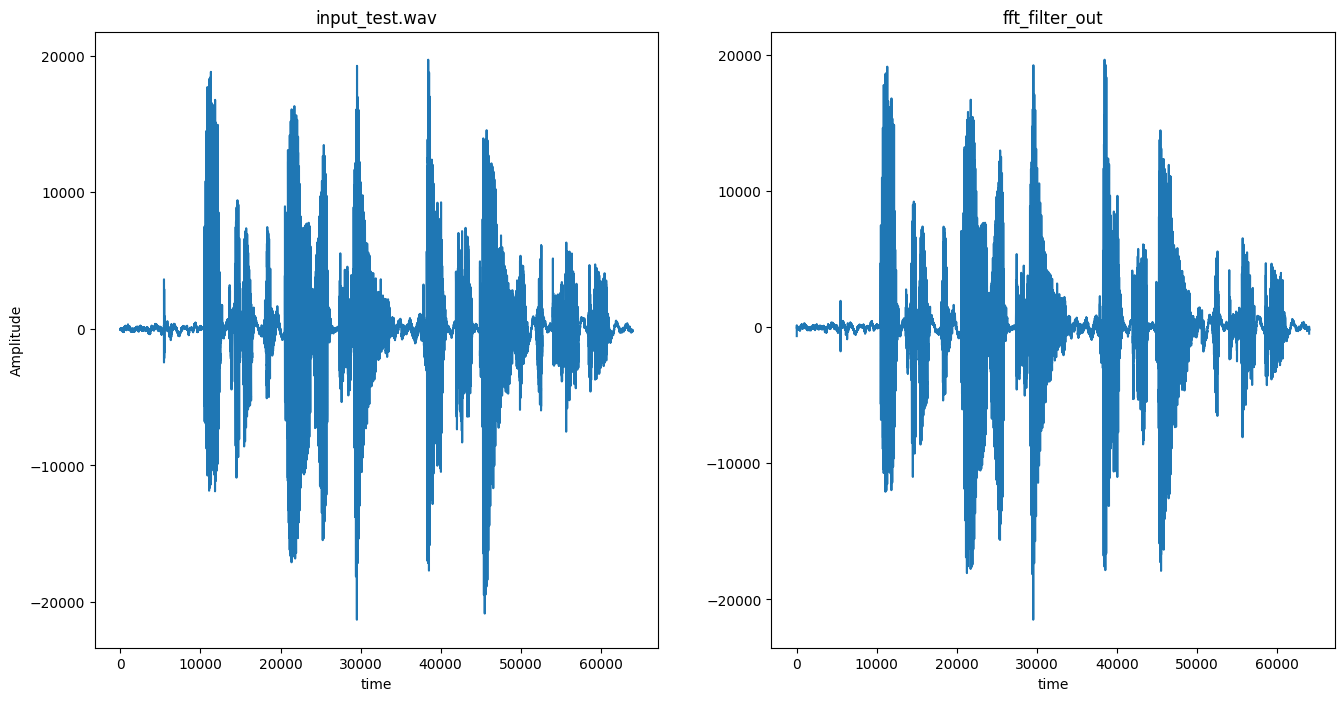

In [ ]:

f,(ax1,ax2)=plt.subplots(1,2)
f.set_figwidth(16)
f.set_figheight(8)
ax1.plot(audio_input)
ax1.set_title("input_test.wav")
ax1.set_xlabel("time")
ax1.set_ylabel("Amplitude")

ax2.plot(fft_filter_out)
#ax2.get_yaxis().set_visible(False)
ax2.set_title("fft_filter_out")
ax2.set_xlabel("time")
plt.show()

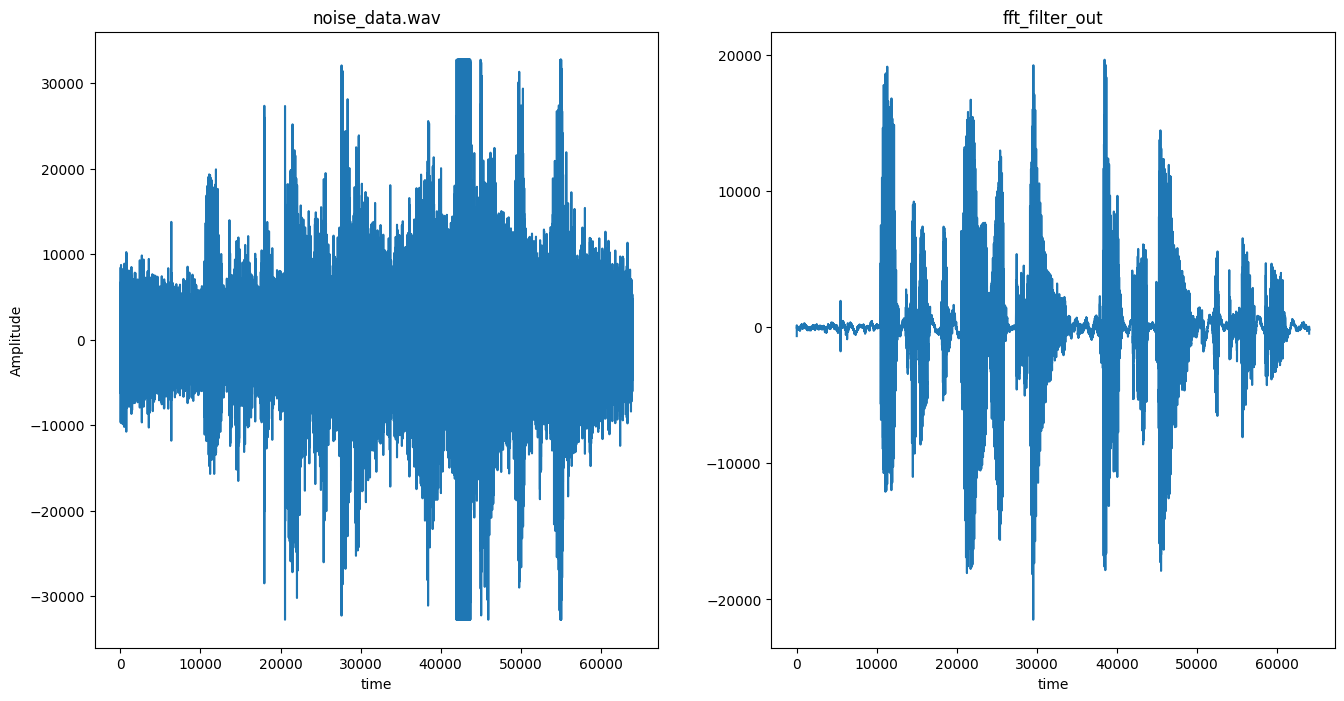

In [ ]:
f,(ax1,ax2)=plt.subplots(1,2)
f.set_figwidth(16)
f.set_figheight(8)
ax1.plot(noise)
ax1.set_title("noise_data.wav")
ax1.set_xlabel("time")
ax1.set_ylabel("Amplitude")

ax2.plot(fft_filter_out)
#ax2.get_yaxis().set_visible(False)
ax2.set_title("fft_filter_out")
ax2.set_xlabel("time")
plt.show()

### ** CALCULATING SNR AFTER APPLING ALL FILTERING **

In [ ]:
# SNR calculation function
def calculate_snr(signal, noise):
    power_signal = np.mean(signal ** 2)
    power_noise = np.mean(noise ** 2)
    snr = 10 * np.log10(power_signal / power_noise)
    return snr

# Calculate noise in the input signal
noise_in_signal = audio_input - noise

# Calculate SNRs
snr_noisy = calculate_snr(audio_input, noise_in_signal)
filtered_noise = noise - fft_filter_out
snr_filtered = calculate_snr(audio_input, filtered_noise)

# Improvement in SNR
improvement = snr_filtered - snr_noisy
print(f"SNR of noisy signal: {snr_noisy:.2f} dB")
print(f"SNR of filtered signal: {snr_filtered:.2f} dB")
print(f"Improvement in SNR: {improvement:.2f} dB")

SNR of noisy signal: 12.88 dB
SNR of filtered signal: 16.39 dB
Improvement in SNR: 3.51 dB
